# Lesson 8 - Source Sheet

A source sheet is an infinite row of sources along one line

In [2]:
# import resources notebook
%run resources.ipynb

In [3]:
# create mesh grid
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x, y = np.linspace(x_start, x_end), np.linspace(y_start, y_end)
X, Y = np.meshgrid(x, y)

In [4]:
# create freestream
u_inf = 1.0
alpha = 0.0

fs = Freestream(u_inf, alpha)
fs.velocity(X, Y)
fs.stream_function(X, Y)

## Finite number of sources along a line

In [6]:
N_sources = 11
strength = 5.0
strength_source = strength/N_sources
x_source = np.zeros(N_sources, dtype=float)
y_source = np.linspace(-1.0, 1.0, N_sources)

# create a source line
sources = np.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = SourceSink(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)
    
# superposition
u = fs.u.copy()
v = fs.v.copy()
for source in sources:
    u += source.u
    v += source.v

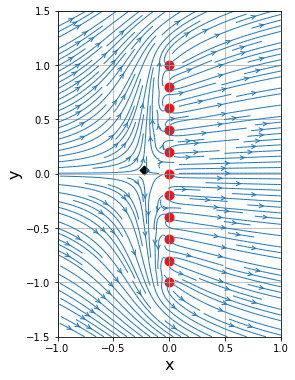

In [9]:
# plot the streamlines
size = 4
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the sources
plt.scatter(x_source, y_source, color='#FF0D0D', s=80, marker='o')

# compute the velocity magnitude and indices of the stagnation point
magnitude = np.sqrt(u**2 + v**2)
j_stag, i_stag = np.unravel_index(magnitude.argmin(), magnitude.shape)

# plot stagnation point
plt.scatter(x[i_stag], y[j_stag], color='black', s=40, marker='D')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end);